<a href="https://colab.research.google.com/github/alfaroqueIslam/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

cust = [127, 80, 105, 92, 120, 115, 93]
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
df = pd.DataFrame({'customers': cust, 'sales': sales})
'''def mn(num):
  n = len(num)
  n1 = sum(num)
  ave = (n1/n)
  return ave'''

'''def svar(num):
  mn1 = mn(num)
  num1 = 0
  for i in num:
    num1 = num1 + ((i - mn1)**2);
  v = (num1/(len(num)-1))
  return v'''

def mn(data, ddof=0):
  data = np.array(data)
  return sum(data)/(len(data)-ddof)
def svar(num):
  num = np.array(num)
  x_bar = mn(num)
  distances = num - x_bar
  squared_distances = distances**2
  variance = sum(squared_distances)/(len(squared_distances)-1)
  return variance

'''def stdv(num):
  mn1 = mn(num)
  num1 = 0
  lst = []
  for i in num:
    num1 = ((i - mn1))**2;
    lst.append(num1)
  num2 = sum(lst)
  v1 = math.sqrt((num2/(len(num)-1)))
  return v1'''

def stdv(num):
  num = np.array(num)
  std = np.sqrt(svar(num))
  return std

print(mn(sales),' ',np.mean(sales))  
print(svar(sales),' ',np.var(sales, ddof=1), df['sales'].var())
print(stdv(sales),' ',np.std(sales, ddof=1), df['sales'].std())

# I tried using my own function and the functions Ryan showed in Q/A and still got
# different results using numpy functions

3052.714285714286   3052.714285714286
214387.90476190473   214387.90476190473 214387.90476190473
463.0204150595357   463.0204150595357 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [23]:

df.cov()


,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [25]:
df.corr()

,customers,sales
customers,1.000000,0.962834
sales,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [26]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df1.head(10)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
5,6,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1
6,7,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1
7,8,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1
8,9,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
9,10,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0


In [32]:
df2 = df1.select_dtypes(include='float64').dropna()
df2.head()

,pclass,survived,age,sibsp,parch,fare,body
3,1.0,0.0,30.0,1.0,2.0,151.5500,135.0
9,1.0,0.0,71.0,0.0,0.0,49.5042,22.0
10,1.0,0.0,47.0,1.0,0.0,227.5250,124.0
25,1.0,0.0,25.0,0.0,0.0,26.0000,148.0
39,1.0,0.0,48.0,0.0,0.0,50.4958,208.0


In [33]:
df2.cov()

,pclass,survived,age,sibsp,parch,fare,body
pclass,0.722619,0.0,-5.854237,0.044958,0.064006,-21.314407,-3.609454
survived,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
age,-5.854237,0.0,196.811725,-2.098180,-0.197126,160.509930,61.705181
sibsp,0.044958,0.0,-2.098180,0.800840,0.168908,8.326293,-8.486975
parch,0.064006,0.0,-0.197126,0.168908,0.725770,5.140167,4.511345
fare,-21.314407,0.0,160.509930,8.326293,5.140167,1810.523420,-179.164684
body,-3.609454,0.0,61.705181,-8.486975,4.511345,-179.164684,9539.839706


In [34]:
df2.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,NaN,-0.490897,0.059099,0.088382,-0.589273,-0.043473
survived,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.490897,NaN,1.000000,-0.167126,-0.016494,0.268890,0.045032
sibsp,0.059099,NaN,-0.167126,1.000000,0.221552,0.218664,-0.097098
parch,0.088382,NaN,-0.016494,0.221552,1.000000,0.141800,0.054217
fare,-0.589273,NaN,0.268890,0.218664,0.141800,1.000000,-0.043110
body,-0.043473,NaN,0.045032,-0.097098,0.054217,-0.043110,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


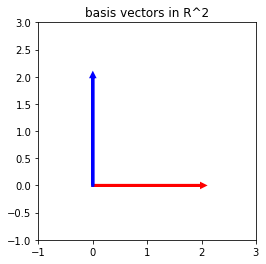

In [35]:
# Axis Bounds
plt.xlim(-1,3)          
plt.ylim(-1,3)

# Unit Vectors
i_hat = [2,0]
j_hat = [0,2]

# Fix Axes
plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("basis vectors in R^2")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [37]:
a = [-5,3,7]
b = [6,-8,2]
c1 = np.dot(a,b)
print(c1)
# Since the dot product is not equal to 0, they are not orthogonal

-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [40]:
c = [2,-15,6,20]
c_norm = np.linalg.norm(c)
c_normsq = np.square(c_norm)
print(c_normsq)
c_dot = np.dot(c,c)
print(c_dot)
c_t = np.transpose(c)
c_tc = np.matmul(c_t,c)
print(c_tc)
# They all result in the same value

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}


\begin{align}
d = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} =2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [45]:
f = np.array([4,12,11,9,2])
fn = np.linalg.norm(f)
fv = (f/fn)
print(fv)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

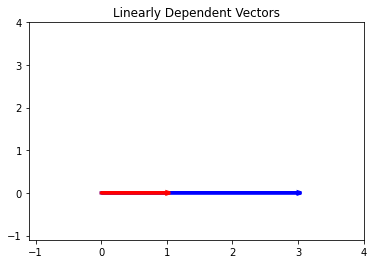

In [5]:
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)


v = [1,0] 

# Scaled Vector
v2 = np.multiply(3, v)


# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L

plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')


plt.title("Linearly Dependent Vectors")
plt.show()

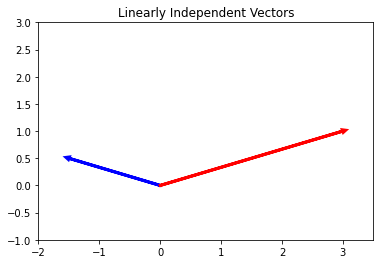

In [42]:

plt.xlim(-2,3.5)          
plt.ylim(-1,3)


a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

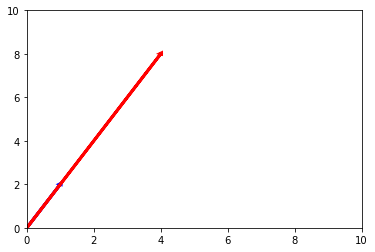

In [7]:

plt.xlim(0,10)          
plt.ylim(0,10)


g = [1,2] 
h = [4, 8]

# Plot Vectors
plt.arrow(0,0, g[0], g[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, h[0], h[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')


plt.show()

# They are linearly dependent so they span 1 dimensional space

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [8]:
# They span 3-dimensional space since they are linearly independent
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
Pr = np.linalg.matrix_rank(P)
print(Pr)

3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


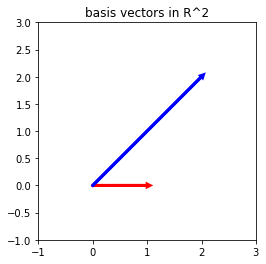

In [52]:
# Axis Bounds
plt.xlim(-1,3)          
plt.ylim(-1,3)

# Unit Vectors
i_h = [1,2]
j_h = [2,1]

# Fix Axes
plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, i_h[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_h[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("basis vectors in R^2")
plt.show()

## 6.2 What does it mean to form a basis?

A set of vectors form a basis when they are linearly independent and span the the vector space $V$

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [47]:
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
Pr = np.linalg.matrix_rank(P)
print(Pr)

3


## 7.2 What does the rank of a matrix tell us?

It tells us the dimension of the vector space spanned by its columns. We can determine if vectors are linearly dependent or independent using this information.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

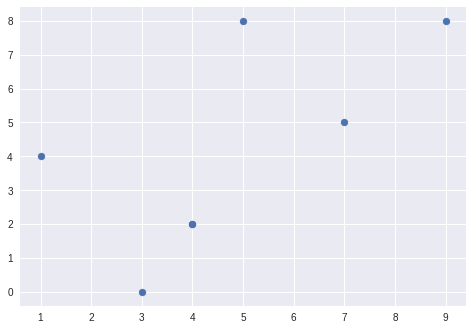

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()